In [ ]:
#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#from pandas.tseries.offsets import MonthBegin
#https://data.jakarta.go.id/dataset/data-penumpang-bus-sekolah-tahun-2019-kpi
#from google.colab import files
#uploaded = files.upload()

**DATA UNDERSTANDING (Mengumpulkan Data)**

In [ ]:
#Memanggil dataset
df = pd.read_csv('https://query.data.world/s/7dqaqpt6bymjvjyawwty3pebm32ysm')

In [ ]:
# Menghilangkan kolom yang tidak diperlukan
bensin = df[["ExtractDate","Fleet","Vehicle","Fuel","Dist.Run","MPG","Type"]]

# lalu tampilkan 
bensin

,ExtractDate,Fleet,Vehicle,Fuel,Dist.Run,MPG,Type
0,11/03/2015,86904,LOADING SH,594.37,3673M,28.09,D
1,11/03/2015,1201,SMALL VAN,893.34,7002M,35.63,D
2,11/03/2015,AV11VGJ,SMALL VAN,682.74,5285M*,36.61,D
3,11/03/2015,98052,MINIBUS,65.00,ONLY,ONE AUDIT,D
4,11/03/2015,BD60XCL,MED VAN,1261.01,9322M,33.6,D
...,...,...,...,...,...,...,...
1211,11/03/2015,1875,MED VAN,1391.96,35693K,72.42,G
1212,11/03/2015,1937,FLATBACK,1067.09,7255M,30.9,G
1213,11/03/2015,1939,FLATBACK,275.61,1496M,24.67,G
1214,11/03/2015,1936,FLATBACK,140.36,6196M?,ERROR,G


In [ ]:
# melihat jumlah baris dan jumlah kolom (bentuk data) pada data df dengan fungsi .shape 
bensin.shape
#Data kita mempunyai 26 kolom dengan 205 baris.

(1216, 7)

In [ ]:
#Memanggil data pertama
bensin.head()

,ExtractDate,Fleet,Vehicle,Fuel,Dist.Run,MPG,Type
0,11/03/2015,86904,LOADING SH,594.37,3673M,28.09,D
1,11/03/2015,1201,SMALL VAN,893.34,7002M,35.63,D
2,11/03/2015,AV11VGJ,SMALL VAN,682.74,5285M*,36.61,D
3,11/03/2015,98052,MINIBUS,65.00,ONLY,ONE AUDIT,D
4,11/03/2015,BD60XCL,MED VAN,1261.01,9322M,33.6,D


In [ ]:
#Memanggil data terakhir
bensin.tail()

,ExtractDate,Fleet,Vehicle,Fuel,Dist.Run,MPG,Type
1211,11/03/2015,1875,MED VAN,1391.96,35693K,72.42,G
1212,11/03/2015,1937,FLATBACK,1067.09,7255M,30.9,G
1213,11/03/2015,1939,FLATBACK,275.61,1496M,24.67,G
1214,11/03/2015,1936,FLATBACK,140.36,6196M?,ERROR,G
1215,11/03/2015,4100,FLATBACK,2019.64,4485M,10.09,G


In [ ]:
#Memanggil tipe-tipe data
bensin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ExtractDate  1216 non-null   object 
 1   Fleet        1214 non-null   object 
 2   Vehicle      1216 non-null   object 
 3   Fuel         1216 non-null   float64
 4   Dist.Run     1216 non-null   object 
 5   MPG          1178 non-null   object 
 6   Type         1216 non-null   object 
dtypes: float64(1), object(6)
memory usage: 66.6+ KB


In [ ]:
#Memanggil informasi statistik data
bensin.describe()

,Fuel
count,1216.000000
mean,3156.452714
std,5995.550156
min,19.310000
25%,615.887500
50%,1319.385000
75%,3260.987500
max,117348.300000


**DATA PREPARATION (Menelaah Data)**

**Data Cleaning (Pembersihan Data)**

In [ ]:
#Konversi 'Fuel' Float to Int
bensin["Fuel"] = bensin["Fuel"].astype("int")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Konversi 'MPG' Object to float
bensin['MPG'] = pd.to_numeric(bensin['MPG'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Cek tabel Dist.Run
bensin.loc[:,'Dist.Run'].head(10)

0     3673M
1     7002M
2    5285M*
3      ONLY
4     9322M
5      355M
6     923M*
7    10074M
8    11656M
9     2217M
Name: Dist.Run, dtype: object

In [ ]:
#Menggunakan Regex
regex = r'^(\d{4})'

In [ ]:
extr = bensin['Dist.Run'].str.extract(r'^(\d{4})', expand=False)
extr.head()

0    3673
1    7002
2    5285
3     NaN
4    9322
Name: Dist.Run, dtype: object

In [ ]:
bensin['Dist.Run'] = pd.to_numeric(extr)
bensin['Dist.Run'].dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dtype('float64')

In [ ]:
bensin['Dist.Run'].isnull().sum()/len(bensin)

0.1118421052631579

In [ ]:
#Konversi 'Dist.Run' Object to float
bensin['Dist.Run'] = pd.to_numeric(bensin['Dist.Run'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Cek Tipe Data
print(bensin.dtypes)

ExtractDate     object
Fleet           object
Vehicle         object
Fuel             int64
Dist.Run       float64
MPG            float64
Type            object
dtype: object


In [ ]:
#Handling missing value
bensin.isnull().sum()

ExtractDate      0
Fleet            2
Vehicle          0
Fuel             0
Dist.Run       136
MPG             56
Type             0
dtype: int64

In [ ]:
#Mengisi nilai nan dengan menggunakan metode 'ffill'

bensin1 = bensin.fillna(method='ffill')
display(bensin1)

,ExtractDate,Fleet,Vehicle,Fuel,Dist.Run,MPG,Type
0,11/03/2015,86904,LOADING SH,594,3673.0,28.09,D
1,11/03/2015,1201,SMALL VAN,893,7002.0,35.63,D
2,11/03/2015,AV11VGJ,SMALL VAN,682,5285.0,36.61,D
3,11/03/2015,98052,MINIBUS,65,5285.0,36.61,D
4,11/03/2015,BD60XCL,MED VAN,1261,9322.0,33.60,D
...,...,...,...,...,...,...,...
1211,11/03/2015,1875,MED VAN,1391,3569.0,72.42,G
1212,11/03/2015,1937,FLATBACK,1067,7255.0,30.90,G
1213,11/03/2015,1939,FLATBACK,275,1496.0,24.67,G
1214,11/03/2015,1936,FLATBACK,140,6196.0,24.67,G


In [ ]:
#Cek keberadaan missing value setelah imputasi
display(bensin1.isna().sum())

ExtractDate    0
Fleet          0
Vehicle        0
Fuel           0
Dist.Run       0
MPG            0
Type           0
dtype: int64

In [ ]:
#Konversi 'MPG' Float to Int
bensin1["MPG"] = bensin1["MPG"].astype("int")
bensin1.dtypes

ExtractDate     object
Fleet           object
Vehicle         object
Fuel             int64
Dist.Run       float64
MPG              int64
Type            object
dtype: object

In [ ]:
#Konversi 'Dist.Run' Float to Int
bensin1["Dist.Run"] = bensin1["Dist.Run"].astype("int")
bensin1.dtypes

ExtractDate    object
Fleet          object
Vehicle        object
Fuel            int64
Dist.Run        int64
MPG             int64
Type           object
dtype: object

In [ ]:
#Hasil Akhir Pembersihan Data
bensin1

,ExtractDate,Fleet,Vehicle,Fuel,Dist.Run,MPG,Type
0,11/03/2015,86904,LOADING SH,594,3673,28,D
1,11/03/2015,1201,SMALL VAN,893,7002,35,D
2,11/03/2015,AV11VGJ,SMALL VAN,682,5285,36,D
3,11/03/2015,98052,MINIBUS,65,5285,36,D
4,11/03/2015,BD60XCL,MED VAN,1261,9322,33,D
...,...,...,...,...,...,...,...
1211,11/03/2015,1875,MED VAN,1391,3569,72,G
1212,11/03/2015,1937,FLATBACK,1067,7255,30,G
1213,11/03/2015,1939,FLATBACK,275,1496,24,G
1214,11/03/2015,1936,FLATBACK,140,6196,24,G


**Data Modeling (Memanipulasi dan Menyimpulkan Data)**

**Handling Outlier**

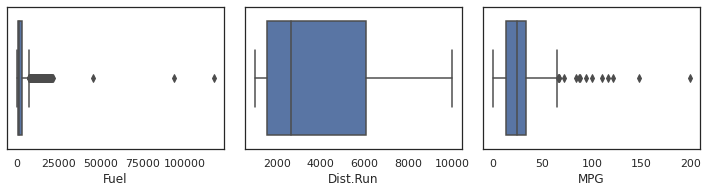

In [ ]:
#Tampilkan Boxplot masing-masing kolom berisi data kuantitatif sebelum handling outlier
#Jenis plot yang digunakan adalah boxplot seaborn
#Melihat adanya pencilan menggunakan Boxplot (Sebelum hapus outlier):
sns.set_theme(style="white")


plt.figure(figsize=(10,5))

for i, col in enumerate(bensin1.describe().columns) :
    plt.subplot(2,3, i+1)
    sns.boxplot(x=bensin1[col])
    plt.tight_layout()

plt.show()

In [ ]:
#Hilangkan Outlier dan tampilkan dataframe hasil menghilangkan outliernya

def index_outliers(dframe):
    
    outliers_index = []
    for col in dframe.describe().columns:
        Q1 = dframe[col].quantile(0.25)
        Q3 = dframe[col].quantile(0.75)
    
        IQR = Q3-Q1
    
        lower_limit = Q1-(1.5*IQR)
        upper_limit = Q3+(1.5*IQR)
    
        outliers = dframe[ (dframe[col]<lower_limit) | (dframe[col]>upper_limit) ].index
        outliers_index.extend(outliers.to_list())
    
    outliers_index = set(outliers_index)  #Convert to set to remove duplicate numbers
    outliers_index = list(outliers_index) #Convert the set back to list
    
    outliers_index.sort()                 #Sort the list
    
    return outliers_index

In [ ]:
index_outliers(bensin1)

[35,
 55,
 106,
 111,
 139,
 152,
 168,
 176,
 177,
 178,
 179,
 180,
 187,
 191,
 193,
 195,
 196,
 197,
 199,
 200,
 202,
 204,
 205,
 214,
 218,
 221,
 222,
 223,
 225,
 227,
 229,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 342,
 465,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 532,
 603,
 618,
 658,
 659,
 695,
 703,
 706,
 708,
 765,
 766,
 767,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 818,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 851,
 852,
 853,
 855,
 905,
 906,
 916,
 917,
 919,
 920,
 921,
 963,
 969,
 971,
 972,
 979,
 980,
 981,
 982,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1025,
 1029,
 1032,
 1033,
 1034,
 1035,
 1060,
 1061,
 1062,
 1063,
 1064,
 1065,
 1066,
 1067,
 1087,
 1088,
 1089,
 1090,
 1091,
 1092,
 1093,
 1094,
 1135,
 1186,
 1191,
 1193,
 1196,
 1198,
 1199,
 1201,
 1211]

In [ ]:
outlier = index_outliers(bensin1)
bensin1.drop(outlier, inplace=True)

In [ ]:
#Data frame setelah menghapus outlier:
bensin1

,ExtractDate,Fleet,Vehicle,Fuel,Dist.Run,MPG,Type
0,11/03/2015,86904,LOADING SH,594,3673,28,D
1,11/03/2015,1201,SMALL VAN,893,7002,35,D
2,11/03/2015,AV11VGJ,SMALL VAN,682,5285,36,D
3,11/03/2015,98052,MINIBUS,65,5285,36,D
4,11/03/2015,BD60XCL,MED VAN,1261,9322,33,D
...,...,...,...,...,...,...,...
1210,11/03/2015,4382,BULK GRITT,2406,6708,7,G
1212,11/03/2015,1937,FLATBACK,1067,7255,30,G
1213,11/03/2015,1939,FLATBACK,275,1496,24,G
1214,11/03/2015,1936,FLATBACK,140,6196,24,G


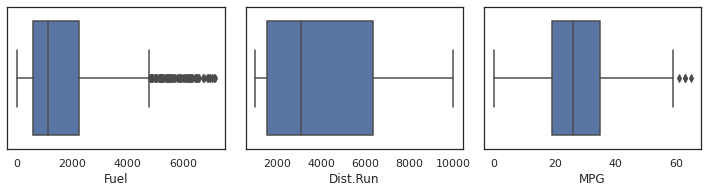

In [ ]:
#Tampilkan Boxplot masing-masing kolom berisi data kuantitatif sesudah handling outlier
#Melihat adanya pencilan menggunakan Boxplot (Setelah hapus outlier):
plt.figure(figsize=(10,5))

for i, col in enumerate(bensin1.describe().columns) :
    plt.subplot(2,3, i+1)
    sns.boxplot(x=bensin1[col])
    plt.tight_layout()
    
plt.show()

**Select Modeling Technique (Memilih teknik model)**

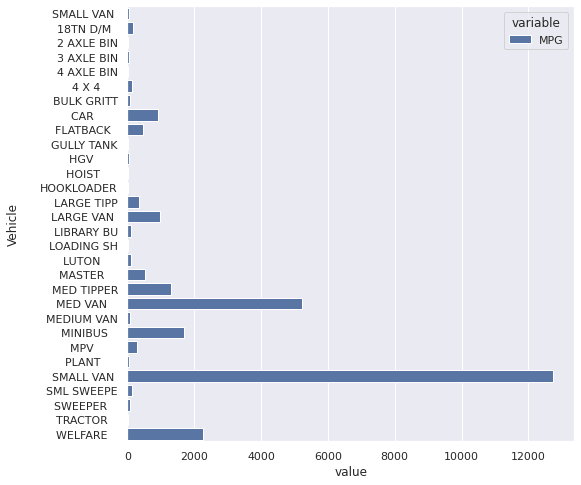

In [ ]:
#Vehicle dengan MPG menggunakan barplot
sns.set({'figure.figsize':(8,8)})
bensin5 = bensin1[['Vehicle','MPG']].groupby('Vehicle', as_index=False).sum().melt(id_vars='Vehicle')
sns.barplot(x='value', y='Vehicle', hue='variable', data=bensin5)

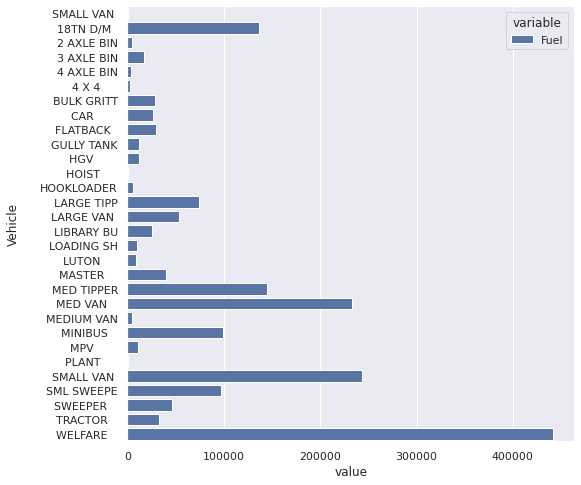

In [ ]:
#Vehicle dengan Fuel menggunakan barplot
sns.set({'figure.figsize':(8,8)})
bensin5 = bensin1[['Vehicle','Fuel']].groupby('Vehicle', as_index=False).sum().melt(id_vars='Vehicle')
sns.barplot(x='value', y='Vehicle', hue='variable', data=bensin5)

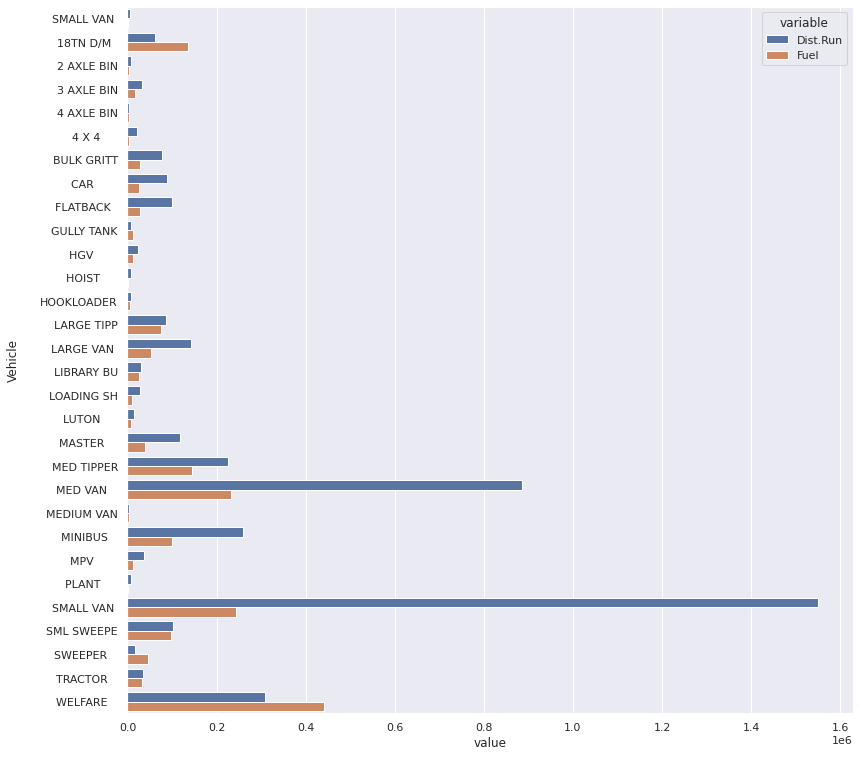

In [ ]:
#Vehicle dengan Dist.Run dan Fuel menggunakan barplot
sns.set({'figure.figsize':(13,13)})
bensin4 = bensin1[['Vehicle', 'Dist.Run', 'Fuel']].groupby('Vehicle', as_index=False).sum().melt(id_vars='Vehicle')
sns.barplot(x='value', y='Vehicle', hue='variable', data=bensin4)

Text(0, 0.5, 'Bensin(liter)')

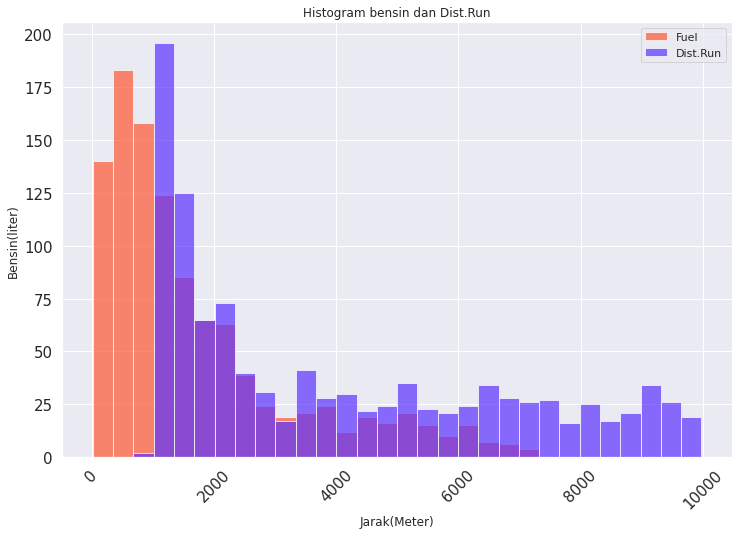

In [ ]:
#Histogram bensin dan Dist.Run menggunakan histogram
bensin1[["Fuel","Dist.Run"]].plot(kind="hist",
                                  alpha=0.7,
                                  bins=30,
                                  title="Histogram bensin dan Dist.Run",
                                  rot=45,
                                  grid=True,
                                  figsize=(12,8),
                                  fontsize=15,
                                  color=["#FF5733","#5C33FF"]
                                  )
plt.xlabel("Jarak(Meter)")
plt.ylabel("Bensin(liter)")

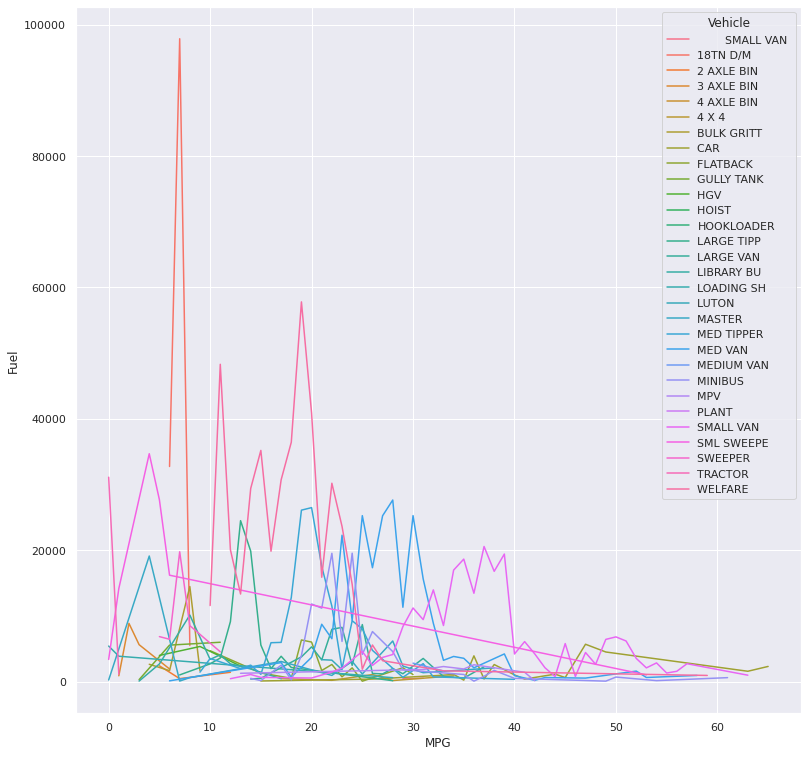

In [ ]:
#Kendaraan, MPG dan Bensin menggunakan Lineplot
top_state = bensin1[["Vehicle"]]
top_state = bensin1[bensin1.Fuel.isin(top_state)]
#print(top_state)

bensin3 = bensin1[['Vehicle', 'MPG', 'Fuel']].groupby(['Vehicle', 'MPG'], as_index=False).agg('sum')
sns.lineplot(x='MPG', y='Fuel', hue='Vehicle', data=bensin3)

In [ ]:
#Import train test split
from sklearn.model_selection import train_test_split as tts

In [ ]:
#Korelasi merupakan suatu pengukuran sejauh mana nilai saling ketergantungan antar variabel.
#Causation merupakan hubungan antara sebab dan akibat antara dua variable.

bensin = bensin1[['Fuel']]
jarak = bensin1[['Dist.Run']]

X_train, X_test, y_train, y_test = tts(bensin, jarak, random_state=21, test_size = 0.2)

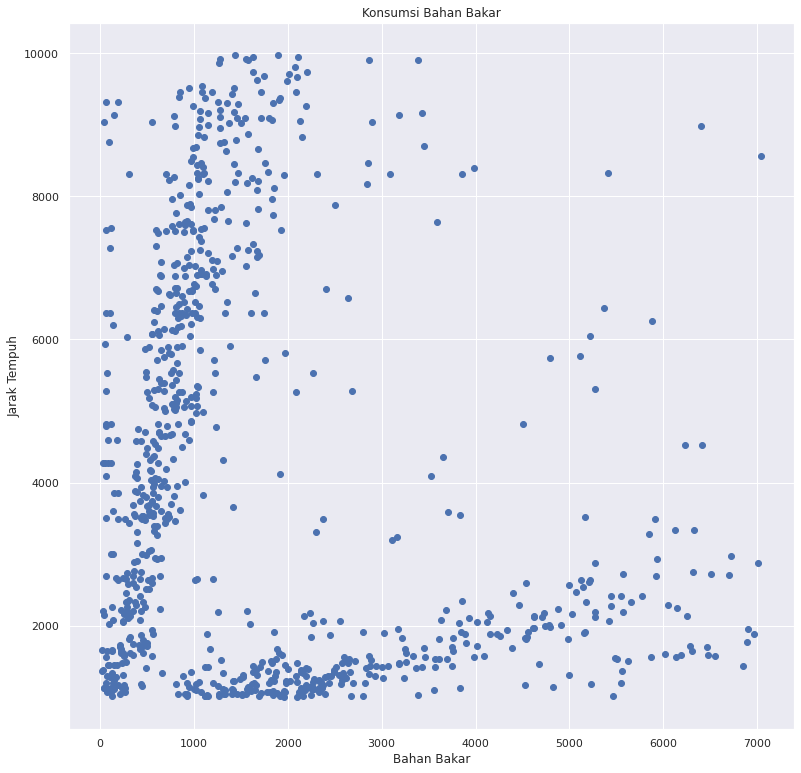

In [ ]:
plt.scatter(X_train, y_train)
plt.xlabel('Bahan Bakar')
plt.ylabel('Jarak Tempuh')
plt.title('Konsumsi Bahan Bakar')
plt.show()


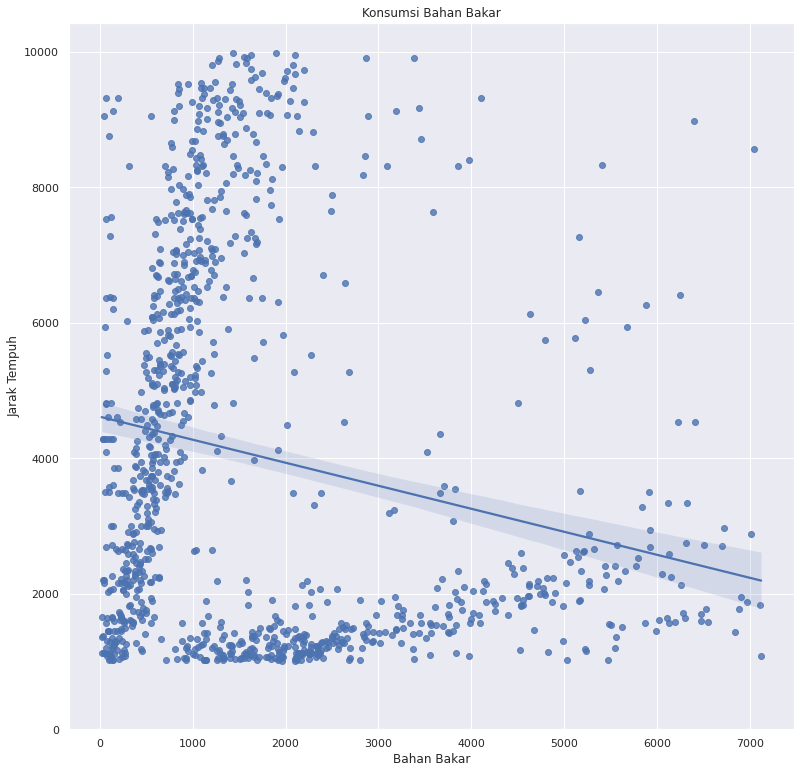

,Fuel,Dist.Run
Fuel,1.000000,-0.197965
Dist.Run,-0.197965,1.000000


In [ ]:
#
sns.regplot(x='Fuel', y='Dist.Run', data=bensin1)
plt.ylim(0,)
plt.xlabel('Bahan Bakar')
plt.ylabel('Jarak Tempuh')
plt.title('Konsumsi Bahan Bakar')
plt.show()

bensin1[['Fuel','Dist.Run']].corr()

In [ ]:
from sklearn.linear_model import LinearRegression as lr
model_1 = lr()
model_1.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Perbandingan nilai antara y_test dan y_pred
y_pred = model_1.predict(X_test)

from sklearn import metrics

r2 = metrics.r2_score(y_test, y_pred)
print("Performansi model untuk set test")
print("-----------------------")
print("Nilai R2 adalah {}".format(r2))

#Nilai R2 adalah 0.00365337419021472
#skor merupakan hasil yang kurang baik karena y_test yang sempurna akan menghasilkan nilai R2 = 1

Performansi model untuk set test
-----------------------
Nilai R2 adalah -0.01591218538796757


In [ ]:
#Descriptive Statistic dengan boxplot
#sns.boxplot(x="Vehicle",y="Fuel",data=bensin1)
#plt.xticks(rotation=90)

In [ ]:
#Grouping mengelompokkan dataframe dengan kombinasi unik
x = bensin1.iloc[:,3:5] #Fuel dan Dist.Run
y = bensin1.iloc[:,5:6] #MPG

X_train, X_test, y_train, y_test = tts(x, y, random_state=100, test_size = 0.2)

* X_train: Untuk menampung data source yang akan dilatih.
* X_test: Untuk menampung data target yang akan dilatih.
* y_train: Untuk menampung data source yang akan digunakan untuk testing.
* y_test: Untuk menampung data target yang akan digunakan untuk testing.

X dan y adalah nama variabel yang digunakan saat mendefinisikan data source dan data target. Parameter *test_size* digunakan untuk mendefinisikan ukuran data testing. Dalam contoh di atas, test_size=0.2 berarti data yang digunakan sebagai data testing adalah sebesar 20% dari keseluruhan dataset.

Perlu diketahui bahwa metode ini akan membagi train set dan test set secara random atau acak. Jadi, jika kita mengulang proses running, maka tentunya hasil yang didapat akan berubah-ubah. Untuk mengatasinya, kita dapat menggunakan parameter *random_state*

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train,y_train)

y_pred = lg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# AUC singkatan dari Area Under Curve, sebuah daerah dalam kuva ROC. 
#Semakin mendekati nilai 1 untuk AUC, maka semakin baik juga model dalam menggambarkan dataset yang dimiliki.
from sklearn import metrics
auc = metrics.accuracy_score(y_test,y_pred)
print(f"Nilai AUC = {auc}")

# Nilai AUC = 0.08196721311475409, nilai yang kurang bagus. 
#setelah model selesai bisa menggunakan model tersebut untuk mengklasifikasikan jika ada data baru yang masuk

Nilai AUC = 0.037383177570093455


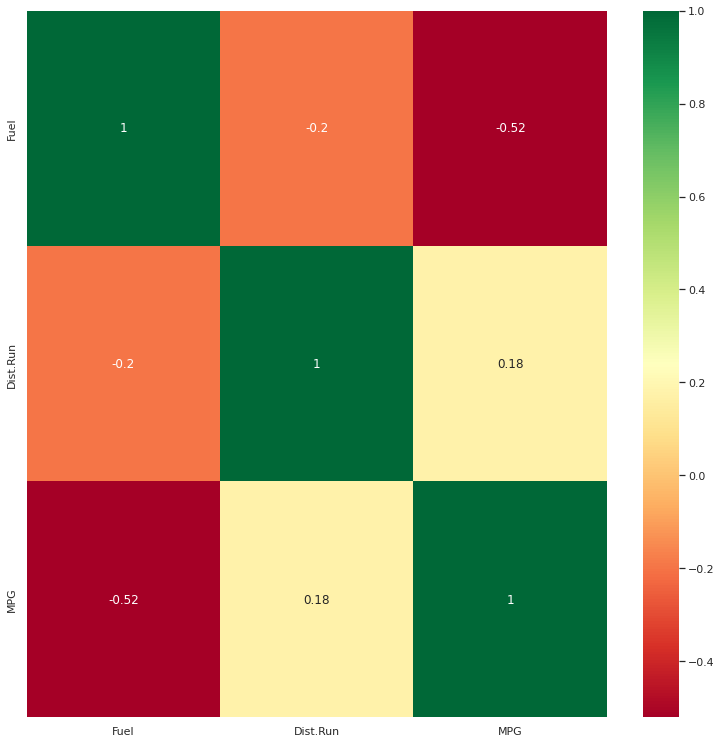

In [ ]:
# mendapatkan korelasi di setiap fitur dalam dataset
corrmat = bensin1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,13))

# plot heatmap
h = sns.heatmap(bensin1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Kesimpulan dari visualisasi heatmap pada gambar yaitu warna hijau menandakan relasi yang kuat atau berlarasan dan warna merah menandakan relasi yang lemah atau berkebalikan, 

**Model Regresi Variabel Jamak**

**Memprediksi MPG vs Dist.Run dan Fuel dari semua kendaraan**

In [ ]:
%matplotlib inline
bensin1.head(10)

,ExtractDate,Fleet,Vehicle,Fuel,Dist.Run,MPG,Type
0,11/03/2015,86904,LOADING SH,594,3673,28,D
1,11/03/2015,1201,SMALL VAN,893,7002,35,D
2,11/03/2015,AV11VGJ,SMALL VAN,682,5285,36,D
3,11/03/2015,98052,MINIBUS,65,5285,36,D
4,11/03/2015,BD60XCL,MED VAN,1261,9322,33,D
5,11/03/2015,BG11ANP,MED VAN,65,9322,24,D
6,11/03/2015,BG11APO,MED VAN,195,9322,32,D
7,11/03/2015,BG60KXK,MED TIPPER,2101,1007,21,D
8,11/03/2015,BG60KZY,MED TIPPER,1657,1165,31,D
9,11/03/2015,BJ10OGE,SMALL VAN,222,2217,45,D


In [ ]:
#Cek Statistika Dasar
bensin1.describe()

,Fuel,Dist.Run,MPG
count,1070.000000,1070.000000,1070.000000
mean,1724.576636,4026.701869,26.059813
std,1617.808217,2775.017435,12.811732
min,19.000000,1001.000000,0.000000
25%,578.000000,1522.000000,19.000000
50%,1119.000000,3089.000000,26.000000
75%,2255.750000,6363.000000,35.000000
max,7122.000000,9978.000000,65.000000


In [ ]:
#Seleksi Data dan Tampilkan
cdf = bensin1[['Fuel','Dist.Run','MPG']]
cdf.head(10)

,Fuel,Dist.Run,MPG
0,594,3673,28
1,893,7002,35
2,682,5285,36
3,65,5285,36
4,1261,9322,33
5,65,9322,24
6,195,9322,32
7,2101,1007,21
8,1657,1165,31
9,222,2217,45


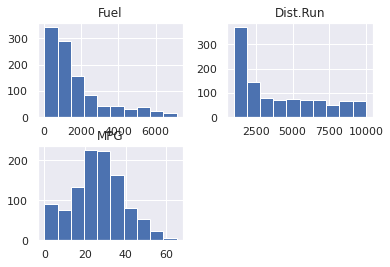

In [ ]:
#Visualisasi Data yang Telah Diseleksi
viz = cdf[['Fuel','Dist.Run','MPG']]
viz.hist()
plt.show()
#Output

**Unsupervised Learning - Clustering**

In [ ]:
#feature scaling
#standarisasi untuk kolom Bensin, MPG dan Jarak Tempuh

from sklearn.preprocessing import StandardScaler

bensin2 = bensin1[['Fuel','MPG','Dist.Run']].copy()

scaler = StandardScaler()

scaled_data = scaler.fit_transform(bensin2)
print(scaled_data)

[[-0.69915909  0.15150911 -0.12751893]
 [-0.51425471  0.69813882  1.07267414]
 [-0.64473907  0.77622878  0.45364995]
 ...
 [-0.89643165 -0.16085072 -0.91238536]
 [-0.9799169  -0.16085072  0.78208969]
 [ 0.18207414 -1.25411013  0.16522867]]


In [ ]:
bensin_scaled = pd.DataFrame(scaled_data, columns=['Fuel','MPG','Dist.Run'])
bensin_scaled

,Fuel,MPG,Dist.Run
0,-0.699159,0.151509,-0.127519
1,-0.514255,0.698139,1.072674
2,-0.644739,0.776229,0.453650
3,-1.026298,0.776229,0.453650
4,-0.286680,0.541959,1.909096
...,...,...,...
1065,0.421399,-1.488380,0.966679
1066,-0.406651,0.307689,1.163887
1067,-0.896432,-0.160851,-0.912385
1068,-0.979917,-0.160851,0.782090


Elbow method untuk menemukan jumlah k kluster yang tepat

In [ ]:
#elbow method beserta visualisasinya
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def elbowMethod(X, k_min=1, k_max=10, save=False):
    K_range = range(k_min,k_max+1)

    result = []
    for k in K_range:
        model = KMeans(n_clusters = k, random_state=20)
        model.fit(X)
        result.append(model.inertia_)
        
    fig, ax = plt.subplots(figsize=(15,8))
    
    ax.plot(K_range, result, marker='o')
    
    for i, value in enumerate(result):
        ax.text(i+1.15, value-0.005, round(value,2), fontsize=13, fontweight='bold')
    
    plt.xticks(K_range)
    plt.grid()
    plt.title('Elbow Method\n', fontsize=18)
    plt.xlabel('\nn-Cluster', fontsize=15)
    plt.ylabel('WCSS\n', fontsize=15)
    
    if save==True:
        plt.savefig('elbowMethod.png', dpi=200)
    
    plt.show()

In [ ]:
#Silhouette method beserta visualisasinya

def silMethod(X, k_min=2, k_max=10, save=False):
    K_range2 = range(k_min,k_max+1)

    result_sm = []
    for k in K_range2:
        model2 = KMeans(n_clusters = k, random_state=20)
        model2.fit(X)
        labels = model2.labels_
    
        s_score = silhouette_score(X, labels, metric='euclidean')
        result_sm.append(s_score)
        
    fig2, ax2 = plt.subplots(figsize=(15,8))
    ax2.plot(K_range2, result_sm, marker='o')
    
    for i, value in enumerate(result_sm):
        ax2.text(i+2.15, value-0.005, round(value,2), fontsize=13, fontweight='bold')
    
    plt.xticks(K_range2)
    plt.grid()
    plt.title('Silhouette Method\n', fontsize=18)
    plt.xlabel('\nn-Cluster', fontsize=15)
    plt.ylabel('Silhouette Score\n', fontsize=15)
    if save==True:
        plt.savefig('silMethod.png', dpi=200)
    plt.show()

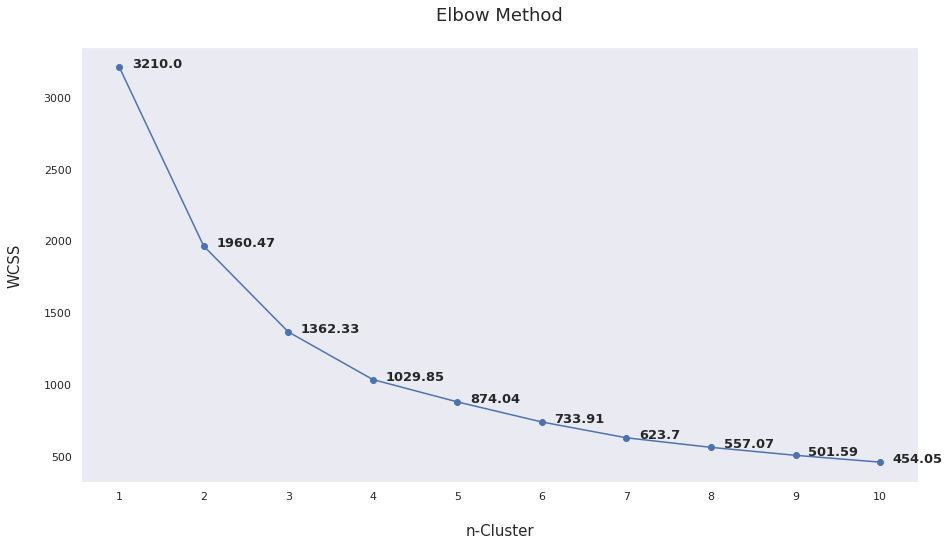

In [ ]:
elbowMethod(bensin_scaled)

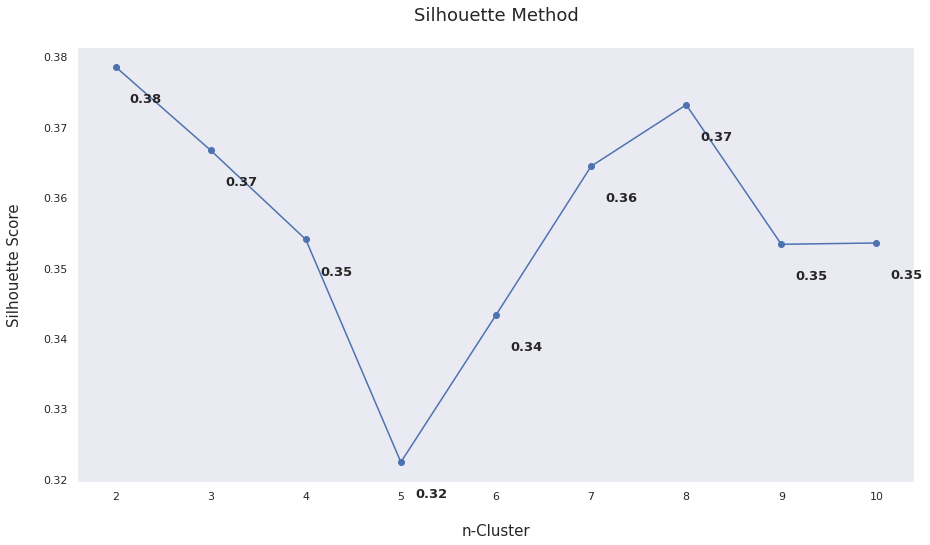

In [ ]:
silMethod(bensin_scaled)

hasil plot
Dari kedua Plot tersebut kita mengetahui nilai terbaik adalah nilai k = 2 , Karena metode elbow yang paling stabil dan metode silhuette nilai puncaknya adalah 2

Gunakan k=4 (rekomendasi methode Elbow dan Silhuet), visualisasi

In [ ]:
from sklearn.cluster import KMeans

k2 = KMeans(n_clusters=2, random_state=9)

k2.fit(bensin_scaled)
bensin_scaled['lbl_k2'] = k2.labels_

bensin_scaled

,Fuel,MPG,Dist.Run,lbl_k2
0,-0.699159,0.151509,-0.127519,0
1,-0.514255,0.698139,1.072674,0
2,-0.644739,0.776229,0.453650,0
3,-1.026298,0.776229,0.453650,0
4,-0.286680,0.541959,1.909096,0
...,...,...,...,...
1065,0.421399,-1.488380,0.966679,1
1066,-0.406651,0.307689,1.163887,0
1067,-0.896432,-0.160851,-0.912385,0
1068,-0.979917,-0.160851,0.782090,0


In [ ]:
bensin_scaled['lbl_k2'].value_counts()

0    701
1    369
Name: lbl_k2, dtype: int64

Plot Hasil Clusterering dengan centroid

In [ ]:
#Get the centroid
centroid_k2 = k2.cluster_centers_
centroid_k2

array([[-0.51929563,  0.48930396,  0.32888921],
       [ 0.98245119, -0.9257102 , -0.62222282]])

In [ ]:
#X axis of Centroid
centroidX = centroid_k2[:,0]
centroidX

array([-0.51929563,  0.98245119])

In [ ]:
#Y axis of Centroid
centroidY = centroid_k2[:,1]
centroidY

array([ 0.48930396, -0.9257102 ])

In [ ]:
#Z axis of Centroid
centroidZ = centroid_k2[:,2]
centroidZ

array([ 0.32888921, -0.62222282])

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


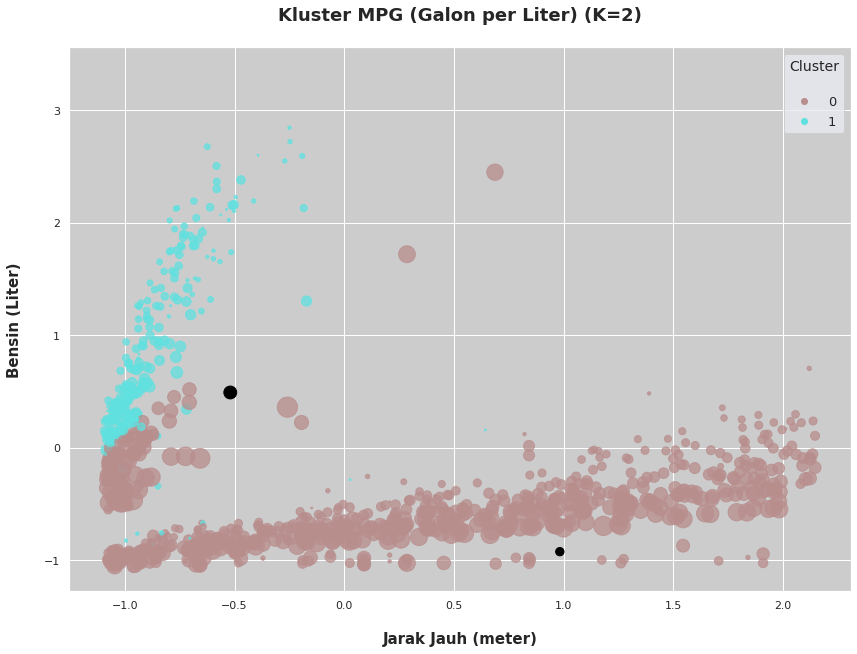

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))

#Create custom color dictionary
colorDict = {0:'#B88E8D', 1:'#60E1E0'}

#set axes bg color
ax.patch.set_facecolor('#CCCCCC')

#plot the data
ax.scatter(bensin_scaled['Dist.Run'], bensin_scaled['Fuel'],
           s=(bensin_scaled['MPG']+abs(bensin_scaled['Fuel'].min()))*100,
           c=bensin_scaled['lbl_k2'].map(colorDict), alpha=0.75, zorder=2)

#plot the centroids
ax.scatter(centroidX, centroidY,
           s=(centroidZ+abs(min(centroidZ))+0.7)*100,
           c='black', marker='o', zorder=3)

ax.set_title('Kluster MPG (Galon per Liter) (K=2)\n', fontsize=18, weight='bold')
ax.set_xlabel('\nJarak Jauh (meter)', fontsize=15, weight='bold')
ax.set_ylabel('Bensin (Liter)\n', fontsize=15, weight='bold')

#Create list of marker objects for legend parameter input
markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colorDict.values()]

#Create the legend
plt.legend(markers, list(colorDict.keys())[:4], prop={'size':13},
           title='Cluster\n', title_fontsize=14)

plt.grid(color='white', zorder=0)

plt.show()


Plot data menggunakan skala asli

In [ ]:
k2.feature_names_in_

array(['Fuel', 'MPG', 'Dist.Run'], dtype=object)

In [ ]:
bensin_2 = bensin1[['Fuel','MPG','Dist.Run']].copy()
bensin_2

,Fuel,MPG,Dist.Run
0,594,28,3673
1,893,35,7002
2,682,36,5285
3,65,36,5285
4,1261,33,9322
...,...,...,...
1210,2406,7,6708
1212,1067,30,7255
1213,275,24,1496
1214,140,24,6196


In [ ]:
bensin_scaled

,Fuel,MPG,Dist.Run,lbl_k2
0,-0.699159,0.151509,-0.127519,0
1,-0.514255,0.698139,1.072674,0
2,-0.644739,0.776229,0.453650,0
3,-1.026298,0.776229,0.453650,0
4,-0.286680,0.541959,1.909096,0
...,...,...,...,...
1065,0.421399,-1.488380,0.966679,1
1066,-0.406651,0.307689,1.163887,0
1067,-0.896432,-0.160851,-0.912385,0
1068,-0.979917,-0.160851,0.782090,0


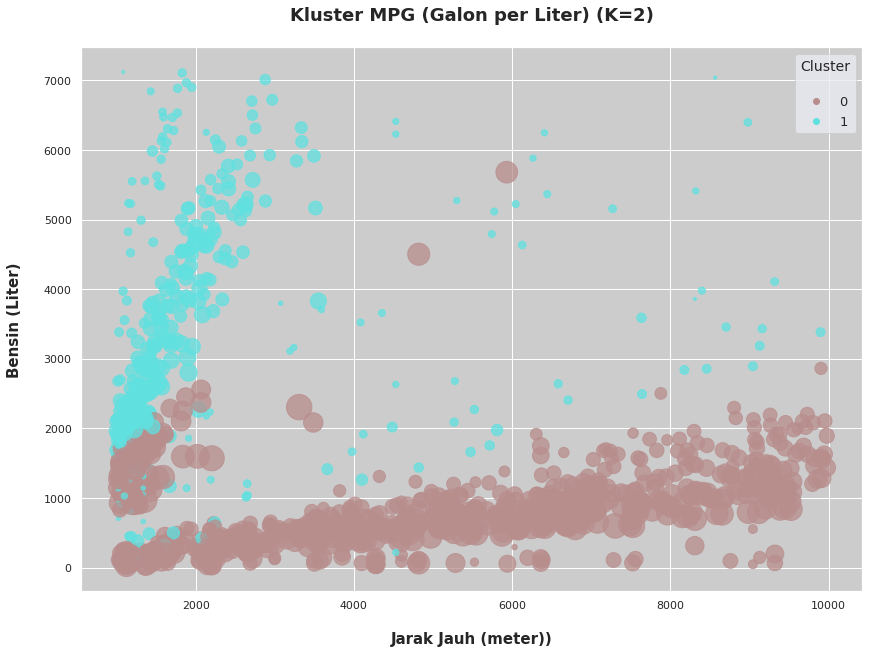

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))

#Create custom color dictionary
colorDict = {0:'#B88E8D', 1:'#60E1E0'}

#set axes bg color
ax.patch.set_facecolor('#CCCCCC')

#plot the data
ax.scatter(bensin_2['Dist.Run'], bensin_2['Fuel'],
           s=bensin_2['MPG']*10,
           c=bensin_scaled['lbl_k2'].map(colorDict), alpha=0.75, zorder=2)

ax.set_title('Kluster MPG (Galon per Liter) (K=2)\n', fontsize=18, weight='bold')
ax.set_xlabel('\nJarak Jauh (meter))', fontsize=15, weight='bold')
ax.set_ylabel('Bensin (Liter)\n', fontsize=15, weight='bold')

#Create list of marker objects for legend parameter input
markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colorDict.values()]

#Create the legend
plt.legend(markers, list(colorDict.keys())[:4], prop={'size':13},
           title='Cluster\n', title_fontsize=14)

plt.grid(color='white', zorder=0)

plt.show()

Plot dengan Centroid dalam Skala Asli 

In [ ]:
#Display the centroids (scaled version)
centroid_k2

array([[-0.51929563,  0.48930396,  0.32888921],
       [ 0.98245119, -0.9257102 , -0.62222282]])

In [ ]:
#Get the centroid in original scale
centroid_k2_originalScale = scaler.inverse_transform(centroid_k2)
centroid_k2_originalScale

array([[ 884.84857143,   32.32571429, 4938.94857143],
       [3313.25135135,   14.20540541, 2300.82972973]])

In [ ]:
#X axis of Centroid
centroidX = centroid_k2_originalScale[:,0]
centroidX

array([ 884.84857143, 3313.25135135])

In [ ]:
#Y axis of Centroid
centroidY = centroid_k2_originalScale[:,1]
centroidY

array([32.32571429, 14.20540541])

In [ ]:
#Z axis of Centroid
centroidZ = centroid_k2_originalScale[:,2]
centroidZ

array([4938.94857143, 2300.82972973])

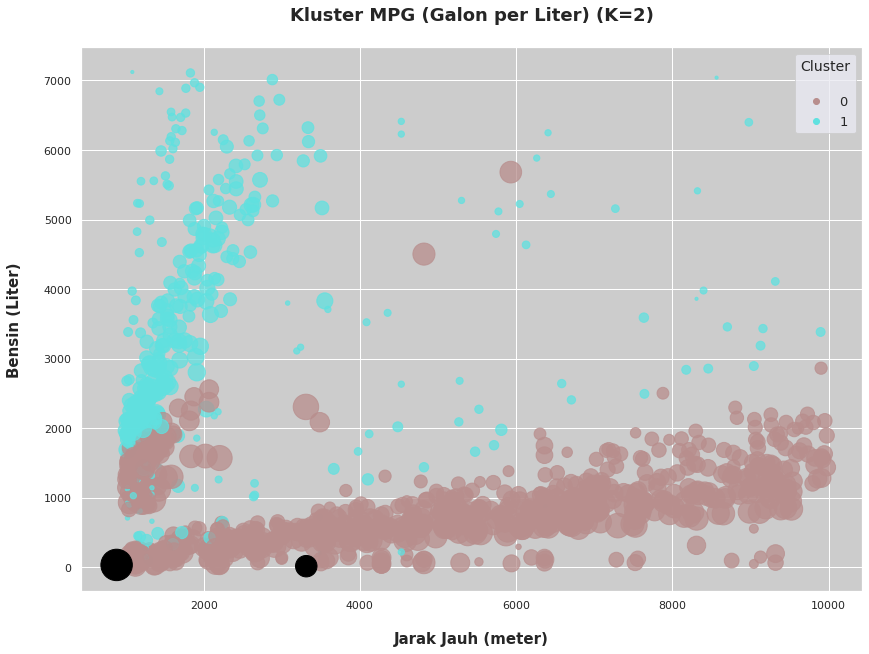

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))

#Create custom color dictionary
colorDict = {0:'#B88E8D', 1:'#60E1E0'}

#set axes bg color
ax.patch.set_facecolor('#CCCCCC')

#plot the data
ax.scatter(bensin_2['Dist.Run'], bensin_2['Fuel'],
           s=bensin_2['MPG']*10,
           c=bensin_scaled['lbl_k2'].map(colorDict), alpha=0.75, zorder=2)


#plot the centroids
ax.scatter(centroidX, centroidY, s=centroidZ*0.2, c='black', marker='o', zorder=3)

ax.set_title('Kluster MPG (Galon per Liter) (K=2)\n', fontsize=18, weight='bold')
ax.set_xlabel('\nJarak Jauh (meter)', fontsize=15, weight='bold')
ax.set_ylabel('Bensin (Liter)\n', fontsize=15, weight='bold')

#Create list of marker objects for legend parameter input
markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colorDict.values()]

#Create the legend
plt.legend(markers, list(colorDict.keys())[:4], prop={'size':13},
           title='Cluster\n', title_fontsize=14)

plt.grid(color='white', zorder=0)

plt.show()

Dari hasil pengamatan, daerah merah menjelaskan bahwa Jarak Tempuh dari 2000 sampai 10000 meter membutuhkan jumlah bensin sekitar 0-5000 liter,

dan daerah hijau menjelaskan bahwa bahwa Jarak Tempuh dari 2000 sampai 4000 meter membutuhkan jumlah bensin sekitar 0-7000 liter.

In [ ]:
bensin_2.corr()

,Fuel,MPG,Dist.Run
Fuel,1.000000,-0.520516,-0.197965
MPG,-0.520516,1.000000,0.176808
Dist.Run,-0.197965,0.176808,1.000000


MPG memiliki korelasi dengan Dist.Run bernilai positif

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


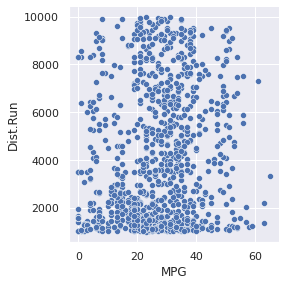

In [ ]:
sns.pairplot(bensin_2, x_vars='MPG', y_vars="Dist.Run",size=4, aspect=1, kind="scatter")
plt.show()

In [ ]:
#Membuat object variabel linier regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Nilai slope/koefisien (m) dan intercept (b),
print(regressor.coef_)
print(regressor.intercept_)

[[-0.00389873  0.00031417]]
[31.42987617]


Dari nilai m dan b diatas, kalau dimasukan ke dalam rumus persamaan menjadi:
#     **y = 0.00036x - 31.22**

In [ ]:
regressor.score(X_test,y_test)
#Model kita mendapatkan accuracy score sebesar 24.44%

0.3022194793908859

In [ ]:
import math
print('Correlation: ', math.sqrt(regressor.score(X_test,y_test)))

Correlation:  0.5497449221146894


In [ ]:
y_prediksi = regressor.predict(X_test)

Cetak nilai Mean Absolute Error, Mean Squared Error, dan Root Mean Squared Error

In [ ]:
from sklearn import metrics 
 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediksi))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediksi))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediksi)))  

Mean Absolute Error: 8.860260329063243
Mean Squared Error: 135.09097006328014
Root Mean Squared Error: 11.622864107580375


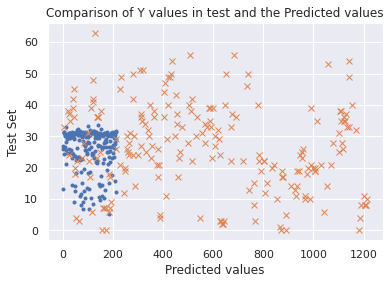

In [ ]:
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.plot(y_prediksi, '.', y_test, 'x')
plt.show()

**Model Evaluasi**

In [ ]:
bensin3 = bensin1[["Fuel","Dist.Run","MPG","Type"]]
bensin3.head(3)

,Fuel,Dist.Run,MPG,Type
0,594,3673,28,D
1,893,7002,35,D
2,682,5285,36,D


In [ ]:
#Cek tabel Type
bensin3.loc[:,'Type'].tail(5)

1210    G
1212    G
1213    G
1214    G
1215    G
Name: Type, dtype: object

In [ ]:
#Konversi 'Type' String  to float
#bensin3['Type'] = pd.to_numeric(bensin3['Type'], errors='coerce')
#df['revenue'] = df['revenue'].apply(lambda x: float(x.split()[0].replace('$', '')))
bensin3['Type'] = bensin3['Type'].replace({'D':0, 'G':1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
bensin3

,Fuel,Dist.Run,MPG,Type
0,594,3673,28,0
1,893,7002,35,0
2,682,5285,36,0
3,65,5285,36,0
4,1261,9322,33,0
...,...,...,...,...
1210,2406,6708,7,1
1212,1067,7255,30,1
1213,275,1496,24,1
1214,140,6196,24,1


In [ ]:
# hitung jumlah masing" data pada kolom survival_status
bensin3['Type'].value_counts()
# 0 adalah tipe D
# 1 adalah tipe G

0    1040
1      30
Name: Type, dtype: int64

In [ ]:
X = bensin3[['Fuel','Dist.Run','MPG']]
y = bensin3['Type']

In [ ]:
# test size= 25%, random state = 42, dan stratify = y
#import library train test split dan cross val
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
## pembuatan objek model
model_logReg = LogisticRegression(random_state = 42)

## latih model
model_logReg.fit(X_train, y_train)

## prediksi.
y_predict = model_logReg.predict(X_test)

In [ ]:
# menghitung cross_val_score dengan scoring = 'roc_auc'
# parameter cv = 10 

score = cross_val_score(model_logReg, X, y, scoring = 'roc_auc', cv = 10)
print(score)

[0.83333333 0.95833333 0.99038462 0.97115385 0.97435897 0.81089744
 0.92307692 0.98076923 0.79487179 0.80448718]


In [ ]:
# cetak rata-rata nilai rata-rata auc score
score.mean()

0.9041666666666666

In [ ]:
# Prediksi data test dengan model yang telah kalian buat 
#import matriks
from sklearn import metrics

auc_score = metrics.roc_auc_score(y_test, y_predict)
auc_score

0.5625

In [ ]:
# import library confusion matrix dan classification report
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# apply confusion matrix dan cetak nilai confusion matrix
#cm = classification_report(y_test, y_predict, labels = (0,1))
bensin_cm = confusion_matrix(y_test, y_predict, labels = (0,1))
bensin_cm

array([[260,   0],
       [  7,   1]])

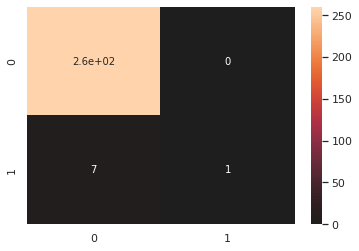

In [ ]:
# visualisasikan nilai confusion matrix ke dalam diagram heatmap
sns.heatmap(bensin_cm,annot=True, center=0)

Overfitting terjadi karena model yang dibuat terlalu fokus pada training dataset tertentu, hingga tidak bisa melakukan prediksi dengan tepat jika diberikan dataset lain yang serupa.

**Selanjutnya Tahap Deployment**